# Satistics for the found jet clusters
 In this jupyter notebook you can look at the properties of the extracted jet clusters. The properties can be read in through the csv file found in export, made in BoxTheJets/Find_export_jet_clusters.ipynb. The test set uses eps=3.0, time_eps=2.0 but this can be varied if wanted to make different sets of Jet clusters. 

In [68]:
#Code for in the pipeline scripts 
#adding flags and filtering for uncertainty cap 

import matplotlib.pyplot as plt
import numpy as np
import os

#Loading in the properties
file_path='BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16.csv'
Cluster_date=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=0,dtype='datetime64')
Cluster_SOL=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=1,dtype=str)
stat_dur,stat_Bx,std_Bx,stat_By,std_By,stat_Lon,stat_Lat,stat_H,upper_H,lower_H,stat_W,std_W,stat_vel,stat_sigma=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=(2,3,4,5,6,7,8,9,10,11,12,13,14,15),dtype=float)


## Flagging
'''
We introduce three binary flags to indicate a higher uncertainty of our jet clusters. 
flag 100 means the jet cluster has a duration of less than 6 minutes, which for many corresponds to a jet cluster found in one Zooniverse subject. 
flag 010 means the velocity estimate could not be calculated because the maximum was reached in the first subject the jet was found in. 
flag 001 means the basepoint has a Longitude of higher than 90 degrees meaning the base point was found to be (slightly) off limb. 
'''

#Flagging
flag1=np.where(stat_dur<6)[0]
flag2=np.where(np.isnan(stat_vel))[0]
flag3=np.where(np.abs(stat_Lon)>90)[0]
tel=0
flags=np.array([])

for i in range(len(Cluster_date)):
    f1,f2,f3= i in flag1, i in flag2, i in flag3
    if f1 or f2 or f3:
        flag=str(int(f1 == True))+str(int(f2 == True))+str(int(f3 == True))
    else:
        flag='000'
        tel+=1
    flags=np.append(flags,flag)

print ('Amount Jet clusters with flags', tel) #new is 167 #old is 188 dbscan0.8 169\

## Filtering
'''In our analysis we look at the sigma measure, which has values between 0 and 1, of the box to determine which jets are of higher confidence. We see how many jets remain after taking various maximal values. We chose a cut of 0.8 for our final exported version'''

print('Jet cluster after no filtering',len(Cluster_date)) #new 397 old 477 dbscan 385 dbscan0.8 404
index_8=np.where(stat_sigma<0.8)[0]
print('Jet cluster after 0.8 filtering', len(index_8)) # new 334 old 426 dbscan 306 dbscan0.8 404
index_6=np.where(stat_sigma<0.6)[0]
print('Jet cluster after 0.6 filtering',len(index_6)) # new 266 old 340 dbscan 145 dbscan0.8 348
index_4=np.where(stat_sigma<0.4)[0]
print('Jet cluster after 0.4 filtering',len(index_6)) # new 266 old 340 dbscan 145 dbscan0.8 348


data= np.loadtxt(file_path,delimiter=',',dtype=str,skiprows=0,comments='%')
flags_arr=np.insert(flags,0,' flags')
data2=np.column_stack((data, np.array(flags_arr)))
csv_final='BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final.csv'
Index_8_header= np.append(0,index_8+1)
np.savetxt(csv_final,data2[Index_8_header], delimiter=",",newline='\n',fmt='%s')

#export final version in Json
from BoxTheJets.aggregation import json_import_list, json_export_list
Jet_clusters=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16.json')
for i,C in enumerate(Jet_clusters):
    C.flag=flags[i]
final_clusters=Jet_clusters[index_8]
json_export_list(final_clusters,'BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final')



Amount Jet clusters with flags 477
Jet cluster after no filtering 1214
Jet cluster after 0.8 filtering 1024
Jet cluster after 0.6 filtering 800
Jet cluster after 0.4 filtering 800
The 1214 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16.json.
The 1024 JetCluster objects are exported to BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final.json.


The 1214 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16.json.
The 828 JetCluster objects are exported to BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final_dfilter.json.


array([   0,    1,    2, ..., 1212, 1213, 1214])

## Plotting histograms of the properties
The following plots are saved in the statitstics folder. 

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('default')
%matplotlib inline

In [52]:
def make_statistics_folder():
    path = 'SOL/statistics/'
    #check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist: 
      os.makedirs(path)
      print("statistics directory is created")
        
        
make_statistics_folder()

In [72]:
file_path='BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final.csv'
Cluster_date=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=0,dtype='datetime64')
Cluster_SOL=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=1,dtype=str)
stat_dur,stat_Bx,std_Bx,stat_By,std_By,stat_Lon,stat_Lat,stat_H,upper_H,lower_H,stat_W,std_W,stat_vel,stat_sigma=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=(2,3,4,5,6,7,8,9,10,11,12,13,14,15),dtype=float)
print(len(Cluster_date))

1024


In [70]:
faulty= np.where(stat_vel<0)
stat_vel[faulty]

array([], dtype=float64)

In [12]:
from BoxTheJets.aggregation import json_import_list, json_export_list
Jet_clusters=json_import_list('BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final.json')
velocity= np.array([Jet_clusters[i].Velocity for i in range(len(Jet_clusters))])
stat_dur = np.array([Jet_clusters[i].Duration for i in range(len(Jet_clusters))])
stat_Bx = np.array([Jet_clusters[i].Bx for i in range(len(Jet_clusters))])
stat_By = np.array([Jet_clusters[i].By for i in range(len(Jet_clusters))])
stat_Lon = np.array([Jet_clusters[i].Lon for i in range(len(Jet_clusters))])
stat_Lat= np.array([Jet_clusters[i].Lat for i in range(len(Jet_clusters))])
stat_sigma = np.array([Jet_clusters[i].sigma for i in range(len(Jet_clusters))])
stat_H = np.array([Jet_clusters[i].Max_Height for i in range(len(Jet_clusters))])
stat_W = np.array([Jet_clusters[i].Width for i in range(len(Jet_clusters))])
stat_vel = np.array([Jet_clusters[i].Velocity for i in range(len(Jet_clusters))])
Cluster_date = np.array([Jet_clusters[i].obs_time for i in range(len(Jet_clusters))])

The 1024 JetCluster objects are imported from BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final.json.


In [74]:
#remove a weird solar conversion
#subject = 70440659
d=np.argwhere((stat_Bx<50000) & (stat_H<20000)& (stat_Bx<1000))

for i in np.arange(len(stat_Bx)):
    if i not in d:
        print(i)


19
20
36
41
69
70
71
123
124
125
129
133
152
401
405
406
407
435
436
437
456
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
640
725
726
727
728
818
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
972


In [97]:
stat_Bx,stat_By,stat_H,stat_dur,stat_vel,stat_sigma, stat_W, stat_Lon,stat_Lat = stat_Bx[d],stat_By[d],stat_H[d],stat_dur[d],stat_vel[d],stat_sigma[d], stat_W[d], stat_Lon[d],stat_Lat[d]

IndexError: index 911 is out of bounds for axis 0 with size 828

In [100]:
data= np.loadtxt('BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final.csv',delimiter=',',dtype=str,skiprows=0,comments='%')
csv_final='BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final_dfilter.csv'
Index_8_header= np.append(0,d+1)
np.savetxt(csv_final,data[Index_8_header], delimiter=",",newline='\n',fmt='%s')

In [99]:
 np.append(0,d+1)

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   22,   23,
         24,   25,   26,   27,   28,   29,   30,   31,   32,   33,   34,
         35,   36,   38,   39,   40,   41,   43,   44,   45,   46,   47,
         48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,
         59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
         73,   74,   75,   76,   77,   78,   79,   80,   81,   82,   83,
         84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,
         95,   96,   97,   98,   99,  100,  101,  102,  103,  104,  105,
        106,  107,  108,  109,  110,  111,  112,  113,  114,  115,  116,
        117,  118,  119,  120,  121,  122,  123,  127,  128,  129,  131,
        132,  133,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  151,  152,  154,  155,
        156,  157,  158,  159,  160,  161,  162,  1

In [15]:
Cluster_date=Cluster_date[d]
print(len(Cluster_date))

828


In [95]:
file_path='BoxTheJets/exports/Jet_clusters_3.0_2.0_11-16_final_dfilter.csv'
Cluster_date=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=0,dtype='datetime64')
Cluster_SOL=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=1,dtype=str)
stat_dur,stat_Bx,std_Bx,stat_By,std_By,stat_Lon,stat_Lat,stat_H,upper_H,lower_H,stat_W,std_W,stat_vel,stat_sigma=np.loadtxt(file_path,delimiter=',',unpack=True,usecols=(2,3,4,5,6,7,8,9,10,11,12,13,14,15),dtype=float)
print(len(Cluster_date))

828


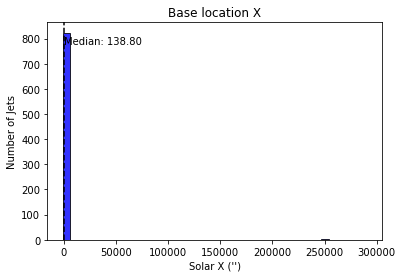

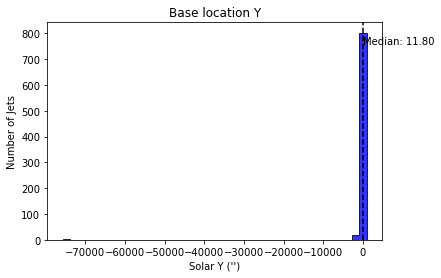

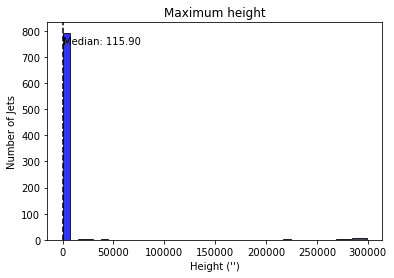

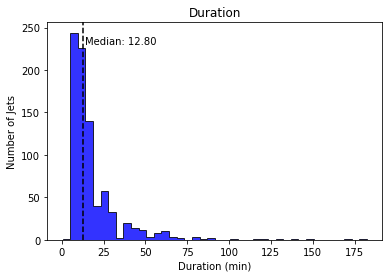

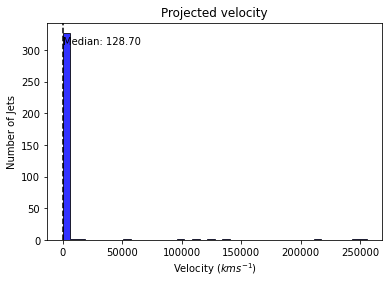

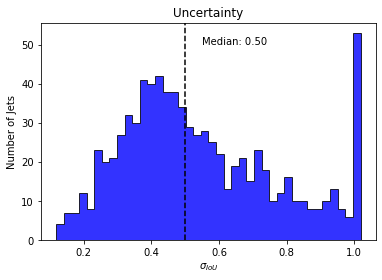

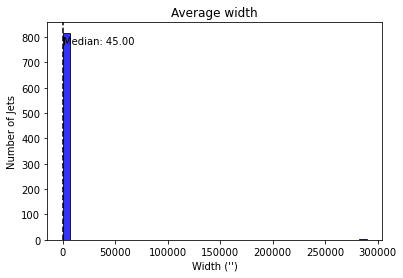

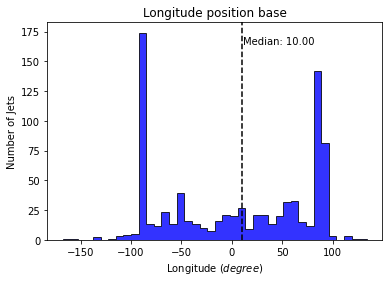

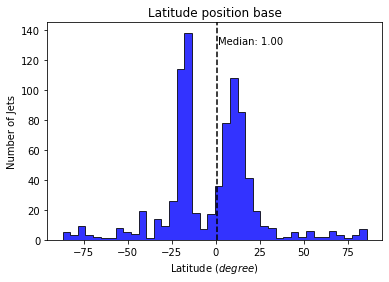

In [96]:
#index_8=np.where(stat_sigma<0.8)[0]
histo=[stat_Bx,stat_By,stat_H,stat_dur,stat_vel*725,stat_sigma, stat_W, stat_Lon,stat_Lat]
title=['Base location X','Base location Y','Maximum height','Duration','Projected velocity','Uncertainty','Average width','Longitude position base' ,'Latitude position base']
xlabel=['Solar X (\'\')', 'Solar Y (\'\')', 'Height (\'\')', 'Duration (min)', 'Velocity ($km s^{-1}$)','$\sigma_{IoU}$', 'Width (\'\')', 'Longitude ($degree$)','Latitude ($degree$)']
#stat_Bxstd,stat_Bystd,stat_Hstd
for l in range(len(histo)):
    plt.ylabel('Number of Jets')
    plt.title(title[l])
    plt.hist(histo[l],histtype='stepfilled',color='blue', alpha=0.8, bins=40, ec="k")#bins=30,color='red',alpha=0.8)
    plt.xlabel(xlabel[l])
    Med=np.round(np.nanmedian(histo[l]),1)
    plt.axvline(Med, color='k', linestyle='dashed', linewidth=1.5)
    min_ylim, max_ylim = plt.ylim()
    plt.text(Med*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(Med))
    #plt.savefig(f'SOL/statistics/stats_{title[l]}_11-16.pdf',dpi=300)
    plt.show()

In [77]:
print('    & Mean & Std Dev & Median & Min & Max \\\\ \hline')
print('H$^{304\,\AA}$ & ',np.round(np.average(stat_H),1), '&', np.round(np.std(stat_H),1) ,'&', np.round(np.median(stat_H),1), '&', np.round(np.min(stat_H),1), '&', np.round(np.max(stat_H),1), '\\\\')
print('W$^{304\,\AA}$ &',np.round(np.average(stat_W),1), '&', np.round(np.std(stat_W),1) ,'&', np.round(np.median(stat_W),1), '&', np.round(np.min(stat_W),1), '&', np.round(np.max(stat_W),1), '\\\\')
print('D$^{304\,\AA}$ &',np.round(np.average(stat_dur),1), '&', np.round(np.std(stat_dur),1) ,'&', np.round(np.median(stat_dur),1), '&', np.round(np.min(stat_dur),1), '&', np.round(np.max(stat_dur),1), '\\\\')
print('V$^{304\,\AA}$ &',np.round(np.nanmean(stat_vel*725),1), '&', np.round(np.nanstd(stat_vel*725),1) ,'&', np.round(np.nanmedian(stat_vel*725),1), '&', np.round(np.nanmin(stat_vel*725),1), '&', np.round(np.nanmax(stat_vel*725),1), '\\\\')
print('Lat &',np.round(np.average(stat_Lat),1), '&', np.round(np.std(stat_Lat),1) ,'&', np.round(np.median(stat_Lat),1), '&', np.round(np.min(stat_Lat),1), '&', np.round(np.max(stat_Lat),1), '\\\\')
print('Lon &', np.round(np.average(stat_Lon),1), '&', np.round(np.std(stat_Lon),1) ,'&', np.round(np.median(stat_Lon),1), '&', np.round(np.min(stat_Lon),1), '&', np.round(np.max(stat_Lon),1), '\\\\')


    & Mean & Std Dev & Median & Min & Max \\ \hline
H$^{304\,\AA}$ &  119.0 & 83.6 & 93.4 & 5.4 & 643.5 \\
W$^{304\,\AA}$ & 45.2 & 32.8 & 35.4 & 3.0 & 288.3 \\
D$^{304\,\AA}$ & 20.8 & 19.8 & 16.0 & 5.4 & 182.4 \\
V$^{304\,\AA}$ & 154.8 & 150.9 & 119.5 & 12.6 & 2302.7 \\
Lat & -0.0 & 27.9 & -2.0 & -87.0 & 87.0 \\
Lon & -1.7 & 68.2 & 6.5 & -168.0 & 134.0 \\


In [23]:
imin= np.argmin(stat_dur)
print(Jet_clusters[imin].obs_time)
imax = np.argmax(stat_dur)
print(Jet_clusters[imax].obs_time)

2011-12-11T01:37:44
2011-05-27T22:10:32


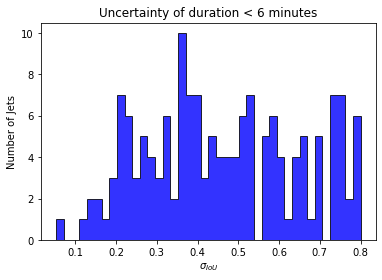

In [41]:
index_short=np.where(stat_dur<6)[0]
index_flag=np.where(flag=='110' or flag=='111')
plt.ylabel('Number of Jets')
plt.title('Uncertainty of duration < 6 minutes')
plt.xlabel('$\sigma_{IoU}$')
plt.hist(stat_sigma[index_short],histtype='stepfilled',color='blue', alpha=0.8, bins=40, ec="k")
plt.savefig('SOL/statistics/stats_statsigma_short.pdf',dpi=300)
plt.show()


In [46]:
y11=(Cluster_date[d]>np.datetime64('2011')) & (Cluster_date[d]<np.datetime64('2012'))
y12=(Cluster_date[d]>np.datetime64('2012')) & (Cluster_date[d]<np.datetime64('2013'))
y13=(Cluster_date[d]>np.datetime64('2013')) & (Cluster_date[d]<np.datetime64('2014'))
y14=(Cluster_date[d]>np.datetime64('2013')) & (Cluster_date[d]<np.datetime64('2014'))
y15=(Cluster_date[d]>np.datetime64('2013')) & (Cluster_date[d]<np.datetime64('2014'))
y16=(Cluster_date[d]>np.datetime64('2013')) & (Cluster_date[d]<np.datetime64('2014'))

IndexError: index 1023 is out of bounds for axis 0 with size 1023

/Users/pjol/miniconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:326: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return super().plot(*args, **kwargs)
/Users/pjol/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/pjol/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
/Users/pjol/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/pjol/miniconda3/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
 

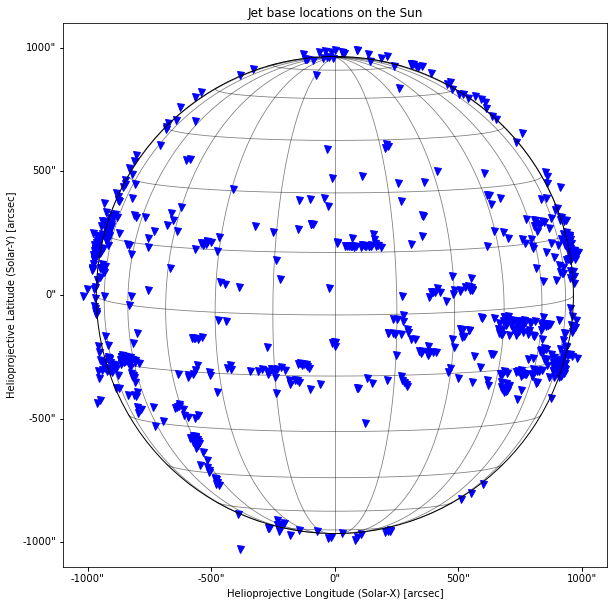

In [82]:
import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import frames

data = np.full((10, 10), np.nan)

# Define a reference coordinate and create a header using sunpy.map.make_fitswcs_header
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2013-10-28', 
                    observer='earth', frame=frames.Helioprojective)

# Scale set to the following for solar limb to be in the field of view
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

# Use sunpy.map.Map to create the blank map
blank_map = sunpy.map.Map(data, header)

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=blank_map)
blank_map.plot()
blank_map.draw_limb(color="k")
blank_map.draw_grid(color="k")

xc = stat_Bx * u.arcsec
yc = stat_By * u.arcsec

#Plot the coordinates of the base points per year
coords = SkyCoord(xc, yc, frame=blank_map.coordinate_frame)
#p = ax.plot_coord(coords[y11], 'o', markersize=7, c='b', marker='v')
#p = ax.plot_coord(coords[y12], 'o', markersize=7, c='r', marker='v')
#p = ax.plot_coord(coords[y13], 'o', markersize=7, c='limegreen', marker='v')

#Plot the coordinates of all years together
p_overplot = ax.plot_coord(coords, 'o', markersize=7, c='b', marker='v')

# Set title.
ax.set_title('Jet base locations on the Sun')

plt.savefig('SOL/statistics/Solar_map.pdf',dpi=300)
plt.show()

## Comparison active regions data
Finally we can compare the locations of the jets with active regions measured over the solar cycle. We have used the data from http://solarcyclescience.com/activeregions.html between the years 2009 and 2014.

In [58]:
data=np.loadtxt('200914_AR.txt', dtype='str')

In [59]:
years=data[:,0].astype(int)
months=data[:,1].astype(float)
days=data[:,2].astype(float)
Lat=data[:,-2].astype(float)

In [60]:
import datetime
dates_AR=np.zeros(len(years),dtype='datetime64[D]')
for i in range(len(years)):
    dates_AR[i] = datetime.date(years[i], int(months[i]), int(days[i]))


/Users/pjol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later


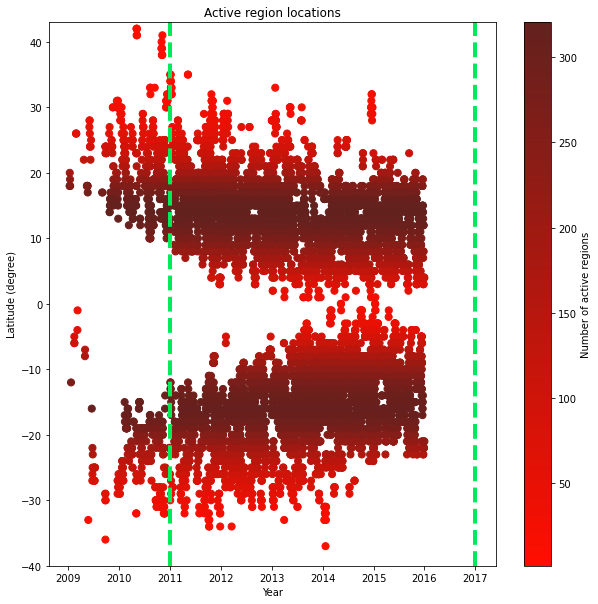

In [61]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde
xy = np.vstack([Lat])
z = gaussian_kde(xy)(xy)*len(Lat)
cmap2 = LinearSegmentedColormap.from_list('', ['#FF0E00', '#63211E'])

fig, ax = plt.subplots(figsize=(10,10))
im = ax.scatter(dates_AR,Lat, c=z, s=50,cmap=cmap2)
#plt.scatter(Cluster_date,stat_Lat, s=30, c='red')
#plt.hist2d(dates_AR, Lat, bins=(50, 50), cmap=plt.cm.jet)
plt.ylabel('Latitude (degree)')
plt.xlabel('Year')
plt.vlines(datetime.date(2011,1,1),-40,43, color='#00EB59',linestyle='dashed',linewidth=4)
plt.vlines(datetime.date(2017,1,1),-40,43, color='#00EB59',linestyle='dashed',linewidth=4)
plt.title('Active region locations')
cbar = plt.colorbar(im)
cbar.set_label('Number of active regions')
plt.savefig('SOL/statistics/AR_location.pdf',dpi=300,bbox='tight_layout')
plt.ylim(-40,43)
plt.show()


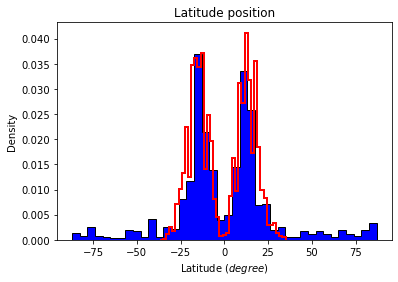

In [62]:
y1113=(dates_AR>np.datetime64('2011')) & (dates_AR<np.datetime64('2017'))
plt.ylabel('Density')
plt.title('Latitude position')
plt.hist(histo[l][index_8],histtype='stepfilled',color='blue', bins=40, ec="k", density=True, label='Active regions')#bins=30,color='red',alpha=0.8)
plt.hist(Lat[y1113],histtype='step',color='red', bins=40, ec="red",density=True, linewidth=2, label='Jet base points')
plt.xlabel(xlabel[l])
plt.savefig(f'SOL/statistics/stats_lat_AR_dbscan0.6.pdf',dpi=300)
plt.show()